# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Specify URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Initialize variables
city_number = 1
city_weather_dict = {}
weather_data_list = []

# Build query URL
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city

    # Make request, store response and JSON-ify response to convert data to a dictionary
    response = requests.get(query_url).json()
    try:
        # Get and print city number and name
        city_name = response["name"]    
        print(f"The city number is {city_number} and city name is {city_name}.")
        city_cloudiness = response["clouds"]["all"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        city_humidity = response["main"]["humidity"]
        city_lat = response["coord"]["lat"]
        city_lon = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_wind_speed = response["wind"]["speed"]
        
        # Build dictionary
        city_weather_dict = {
            "name": city_name,
            "cloudiness": city_cloudiness,
            "country": city_country,
            "date": city_date,
            "humidity": city_humidity,
            "latitude": city_lat,
            "longitude": city_lon,
            "max temperature": city_max_temp,
            "wind speed": city_wind_speed
        }
        
        # Add dictionary to list
        weather_data_list.append(city_weather_dict)
        
        # Increment city number
        city_number = city_number + 1
    except:
        continue
   
weather_data_df = pd.DataFrame(weather_data_list)
weather_data_df


The city number is 1 and city name is Iqaluit.
The city number is 2 and city name is Lompoc.
The city number is 3 and city name is Rikitea.
The city number is 4 and city name is Jamestown.
The city number is 5 and city name is Puerto Ayora.
The city number is 6 and city name is Tanhacu.
The city number is 7 and city name is Ahipara.
The city number is 8 and city name is Namibe.
The city number is 9 and city name is Saldanha.
The city number is 10 and city name is San Patricio.
The city number is 11 and city name is Ushuaia.
The city number is 12 and city name is Ribeira Grande.
The city number is 13 and city name is Khatanga.
The city number is 14 and city name is Usolye.
The city number is 15 and city name is Kalemie.
The city number is 16 and city name is Zenzeli.
The city number is 17 and city name is Lebu.
The city number is 18 and city name is Pundaguitan.
The city number is 19 and city name is Punta Arenas.
The city number is 20 and city name is Albany.
The city number is 21 and 

The city number is 167 and city name is Jiuquan.
The city number is 168 and city name is Thompson.
The city number is 169 and city name is La Ronge.
The city number is 170 and city name is Boa Vista.
The city number is 171 and city name is Mansa.
The city number is 172 and city name is Kondinskoye.
The city number is 173 and city name is Pisco.
The city number is 174 and city name is Ribnitz-Damgarten.
The city number is 175 and city name is Dunmore Town.
The city number is 176 and city name is Longyearbyen.
The city number is 177 and city name is Mint Hill.
The city number is 178 and city name is Tandil.
The city number is 179 and city name is Tiksi.
The city number is 180 and city name is Shelburne.
The city number is 181 and city name is Cangzhou.
The city number is 182 and city name is Vila Franca do Campo.
The city number is 183 and city name is Kitimat.
The city number is 184 and city name is Torbay.
The city number is 185 and city name is Haimen.
The city number is 186 and city 

The city number is 330 and city name is Balezino.
The city number is 331 and city name is Ponta do Sol.
The city number is 332 and city name is Beinamar.
The city number is 333 and city name is Morant Bay.
The city number is 334 and city name is Sena Madureira.
The city number is 335 and city name is Baft.
The city number is 336 and city name is Taoudenni.
The city number is 337 and city name is Padang.
The city number is 338 and city name is Vogar.
The city number is 339 and city name is Kirakira.
The city number is 340 and city name is Uthal.
The city number is 341 and city name is Ploemeur.
The city number is 342 and city name is Wenling.
The city number is 343 and city name is Haines Junction.
The city number is 344 and city name is Auki.
The city number is 345 and city name is Doha.
The city number is 346 and city name is Kaitangata.
The city number is 347 and city name is Wagar.
The city number is 348 and city name is Champerico.
The city number is 349 and city name is Santiago d

The city number is 493 and city name is Voh.
The city number is 494 and city name is Seoul.
The city number is 495 and city name is Cannington.
The city number is 496 and city name is Tricase.
The city number is 497 and city name is Marystown.
The city number is 498 and city name is Pitlochry.
The city number is 499 and city name is Cidreira.
The city number is 500 and city name is Marienburg.
The city number is 501 and city name is Cayenne.
The city number is 502 and city name is Nome.
The city number is 503 and city name is Coahuayana.
The city number is 504 and city name is Rock Sound.
The city number is 505 and city name is Nabire.
The city number is 506 and city name is Itacarambi.
The city number is 507 and city name is Kiruna.
The city number is 508 and city name is Daru.
The city number is 509 and city name is Deputatskiy.
The city number is 510 and city name is Prince Albert.
The city number is 511 and city name is Benguela.
The city number is 512 and city name is Smithers.
Th

,cloudiness,country,date,humidity,latitude,longitude,max temperature,name,wind speed
0,75,CA,1549152000,78,63.75,-68.52,10.40,Iqaluit,14.99
1,20,US,1549152420,69,34.64,-120.46,59.00,Lompoc,11.41
2,8,PF,1549153731,100,-23.12,-134.97,80.80,Rikitea,8.66
3,0,AU,1549153634,47,-33.21,138.60,85.98,Jamestown,10.00
4,20,EC,1549152000,74,-0.74,-90.35,80.60,Puerto Ayora,9.17
5,48,BR,1549153733,76,-14.02,-41.25,74.73,Tanhacu,6.20
6,32,NZ,1549153734,68,-35.17,173.16,76.71,Ahipara,14.47
7,36,AO,1549153734,99,-15.19,12.15,77.56,Namibe,8.77
8,0,PT,1549153735,94,41.42,-6.55,30.40,Saldanha,4.29
9,48,PY,1549153736,71,-26.98,-56.83,80.31,San Patricio,6.20


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# Convert Data Frame to csv & save
weather_data_df.to_csv("./weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

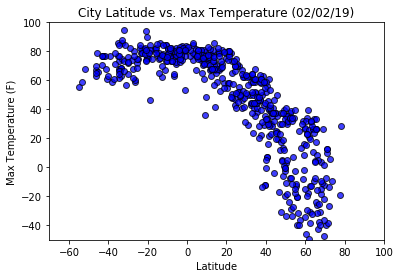

<Figure size 432x288 with 0 Axes>

In [43]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["max temperature"]

# Set Limits
plt.ylim(-50, 100)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevMaxTemp.png")

#### Latitude vs. Humidity Plot

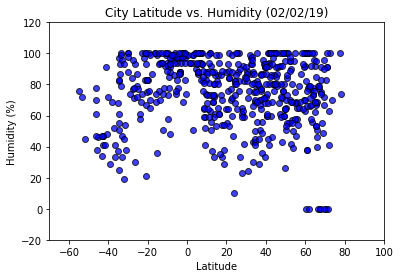

<Figure size 432x288 with 0 Axes>

In [44]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["humidity"]

# Set Limits
plt.ylim(-20, 120)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevHumidity.png")

#### Latitude vs. Cloudiness Plot

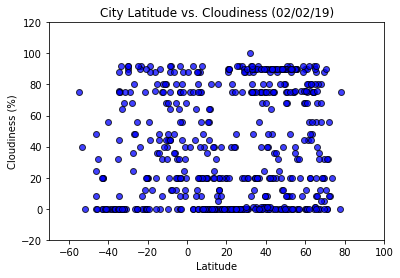

<Figure size 432x288 with 0 Axes>

In [45]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["cloudiness"]

# Set Limits
plt.ylim(-20, 120)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevCloudiness.png")

#### Latitude vs. Wind Speed Plot

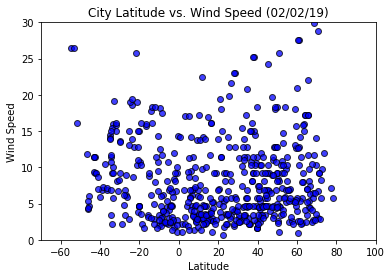

<Figure size 432x288 with 0 Axes>

In [46]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["wind speed"]

# Set Limits
plt.ylim(0, 30)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevWindSpeed.png")